In [1]:
!pip3 install scipy==1.1.0
!pip3 install sklearn==1.1.0

# You need to restart the Runtime after installing the scipy

ERROR: Could not find a version that satisfies the requirement sklearn==1.1.0 (from versions: 0.0)
ERROR: No matching distribution found for sklearn==1.1.0


In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.misc import imread, imresize, imsave
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.transform import resize
import sys
import os
!unzip ./HandwritingImg.zip

Archive:  ./HandwritingImg.zip
 extracting: HandwritingImg/img1.png  
 extracting: HandwritingImg/img10.png  
 extracting: HandwritingImg/img100.png  
 extracting: HandwritingImg/img1000.png  
 extracting: HandwritingImg/img1001.png  
 extracting: HandwritingImg/img1002.png  
 extracting: HandwritingImg/img1003.png  
 extracting: HandwritingImg/img1004.png  
 extracting: HandwritingImg/img1005.png  
 extracting: HandwritingImg/img1006.png  
 extracting: HandwritingImg/img1007.png  
 extracting: HandwritingImg/img1008.png  
 extracting: HandwritingImg/img1009.png  
 extracting: HandwritingImg/img101.png  
 extracting: HandwritingImg/img1010.png  
 extracting: HandwritingImg/img1011.png  
 extracting: HandwritingImg/img1012.png  
 extracting: HandwritingImg/img1013.png  
 extracting: HandwritingImg/img1014.png  
 extracting: HandwritingImg/img1015.png  
 extracting: HandwritingImg/img1016.png  
 extracting: HandwritingImg/img1017.png  
 extracting: HandwritingImg/img1018.png  
 extractin

In [3]:
np.set_printoptions(threshold=sys.maxsize)

class Extract_Letters:
    def extractFile(self, filename):
        image = imread(filename, 1)

        # apply threshold in order to make the image binary
        bw = (image < 120).astype(np.float)

        # remove artifacts connected to image border
        cleared = bw.copy()
        # clear_border(cleared)

        # label image regions
        label_image = label(cleared, neighbors=8)
        borders = np.logical_xor(bw, cleared)
        label_image[borders] = -1

        letters = list()
        order = list()

        for region in regionprops(label_image):
            minr, minc, maxr, maxc = region.bbox
            # skip small images
            if maxr - minr > len(image) / 250:  # better to use height rather than area.
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                          fill=False, edgecolor='red', linewidth=2)
                order.append(region.bbox)

        # sort the detected characters left->right, top->bottom
        lines = list()
        first_in_line = ''
        counter = 0

        # worst case scenario there can be 1 character per line
        for x in range(len(order)):
            lines.append([])

        for character in order:
            if first_in_line == '':
                first_in_line = character
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) < (first_in_line[2] - first_in_line[0]):
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) > (first_in_line[2] - first_in_line[0]):
                first_in_line = character
                counter += 1
                lines[counter].append(character)

        for x in range(len(lines)):
            lines[x].sort(key=lambda tup: tup[1])

        final = list()
        prev_tr = 0
        prev_line_br = 0

        for i in range(len(lines)):
            for j in range(len(lines[i])):
                tl_2 = lines[i][j][1]
                bl_2 = lines[i][j][0]
                if tl_2 > prev_tr and bl_2 > prev_line_br:
                    tl, tr, bl, br = lines[i][j]
                    letter_raw = bw[tl:bl, tr:br]
                    letter_norm = resize(letter_raw, (20, 20))
                    final.append(letter_norm)
                    prev_tr = lines[i][j][3]
                if j == (len(lines[i]) - 1):
                    prev_line_br = lines[i][j][2]
            prev_tr = 0
            tl_2 = 0
#             print ('Characters recognized: ' + str(len(final)))
        return final
    
    def __init__(self):
        print("Extracting characters...")


start_time = time.time()
extract = Extract_Letters()
# training_dir=['./HandwritingImg']
training_dir=['/content/HandwritingImg']

trainingSet=[]
trainingTarget=[]


# for direct in (os.listdir(training_dir)):
#     print(direct)
# for file in os.listdir(training_dir):
#     print(file)
folder_string = 'abcdefghijklmnopqrstuvwxyzabcdefghijklmnopqrstuvwxyz123456789'
# name_counter = 600
# for files in training_files:
#     letters = extract.extractFile(files)
#     string_counter = 0

#     for i in letters:
#         if string_counter > 60:
#             string_counter = 0
#         imsave('./training_type/' + str(folder_string[string_counter]) + '/' + str(name_counter) + '_snippet.png', i)
#         trainingSet.append(np.asarray(i.flatten()))
#         trainingTarget.append(folder_string[string_counter])
#         string_counter += 1
#         name_counter += 1

# print (time.time() - start_time, "seconds" )

Extracting characters...


In [4]:
testingSet=[]
for i in range(1,61):
    for j in range(1,56):
        counter=((i-1)*55)+j
        # image='./HandwritingImg/img'+str(counter)+'.png'
        image='/content/HandwritingImg/img'+str(counter)+'.png'
        img_data=imread(image,1)
        data=np.ravel(img_data)
        trainingSet.append(data)
        trainingTarget.append(folder_string[i])
        if((j%5)==0):
            testingSet.append(data)
    print(i)
print(len(testingSet[1]))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
784


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# from keras.models import Sequential
# from keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Dropout, Flatten, Dense
# import keras
# model 1 - mlp(NN)
nn=MLPClassifier(solver='sgd', max_iter=500, alpha=1e-4,
                     hidden_layer_sizes=(122,122,61), tol=0.000000001)

# nn=MLPClassifier(solver='sgd', max_iter=10, alpha=1e-4,
#                      hidden_layer_sizes=(61,122,61), random_state=21, tol=0.000000001)
nn.fit(trainingSet, trainingTarget)
# # CREating a test NN
# def nonlin(x,deriv=False):
#     if(deriv):
#         return x*(1-x)
#     return 1/(1+np.exp(-x))
# syn0=2*np.random.random((784,784))-1
# print(len(trainingSet))
# print(len(syn0))
# # testingSet=trainingSet
# # # print(len(nonlin(np.dot(trainingSet, syn0))))
# # # model 1 - neural network
# for x in range(10):
#     l0=trainingSet
#     l1=nonlin(np.dot(l0, syn0))
#     l1_err= testingSet[0:660]-l1[0:660]
#     l1_delta=l1_err*nonlin(l1[0:660],True)
#     syn0+=np.dot(np.asarray(l0[0:660]).T, l1_delta)

# # print("OUTPUT:")
# print(np.asarray(l1[0:1], dtype=np.str))
print("\n\n\n")
# model 2 knn
knn_clf=KNeighborsClassifier(n_jobs=1, weights='distance', n_neighbors=4)
knn_clf.fit(trainingSet, trainingTarget)

print(knn_clf.predict([trainingSet[0]]))
from sklearn.model_selection import cross_val_score


#model 3- svm
svm_clf=svm.SVC()
svm_clf.fit(trainingSet, trainingTarget)




# model 4 - rfc
rfc=RandomForestClassifier(n_estimators=200, n_jobs=2, random_state=0)
rfc.fit(trainingSet, trainingTarget)
rfc_score= cross_val_score(rfc, trainingSet, trainingTarget, cv=3, scoring="accuracy")
# acc=rfc.predict([trainingSet[0]])
# print(acc)
# print(f"RFC ACCuracy: %f", rfc_score)
# testing_files = ['./ocr/testing/adobe.png', './ocr/testing/shazam.png']
# testingSet=[]
all_files_mlp=[]
all_files_knn=[]
all_files_rfc=[]
all_files_svm=[]
# for files in testing_files:
#     test=extract.extractFile(files)
#     file_data=[]
#     count=0
for i in testingSet:
    value_nn=nn.predict([np.asarray(i.flatten())])
    value_knn=knn_clf.predict([np.asarray(i.flatten())])
    value_svm=svm_clf.predict([np.asarray(i.flatten())])
    value_rfc=rfc.predict([np.asarray(i.flatten())])
    all_files_mlp.append(value_nn)
    all_files_knn.append(value_knn)
    all_files_svm.append(value_svm)
    all_files_rfc.append(value_rfc)
    all_files_knn.append("---------")
    all_files_rfc.append("---------")

print("NN")   
print(np.asarray(all_files_mlp, dtype='object'))
print("\n\n\n")
temp = cross_val_score(nn, trainingSet, trainingTarget, cv=3, scoring="accuracy")
print("NN Acc:", temp)



print("KNN")   
print(np.asarray(all_files_knn, dtype='object'))
# print(all_files_knn)
print("\n\n\n")
temp = cross_val_score(knn_clf, trainingSet, trainingTarget, cv=3, scoring="accuracy")
print("KNN Acc:", temp)
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)






['b']
NN
[['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']
 ['b']


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NN Acc: [0.03363636 0.03363636 0.03272727]
KNN
[array(['b'], dtype='<U1') '---------' array(['b'], dtype='<U1')
 '---------' array(['b'], dtype='<U1') '---------'
 array(['b'], dtype='<U1') '---------' array(['b'], dtype='<U1')
 '---------' array(['b'], dtype='<U1') '---------'
 array(['b'], dtype='<U1') '---------' array(['b'], dtype='<U1')
 '---------' array(['b'], dtype='<U1') '---------'
 array(['b'], dtype='<U1') '---------' array(['b'], dtype='<U1')
 '---------' array(['c'], dtype='<U1') '---------'
 array(['c'], dtype='<U1') '---------' array(['c'], dtype='<U1')
 '---------' array(['c'], dtype='<U1') '---------'
 array(['c'], dtype='<U1') '---------' array(['c'], dtype='<U1')
 '---------' array(['c'], dtype='<U1') '---------'
 array(['c'], dtype='<U1') '---------' array(['c'], dtype='<U1')
 '---------' array(['c'], dtype='<U1') '---------'
 array(['c'], dtype='<U1') '---------' array(['d'], dtype='<U1')
 '---------' array(['d'], dtype='<U1') '---------'
 array(['d'], dtype='<U1'

LEARNING CURVE KNN
LEARNING CURVE SVM


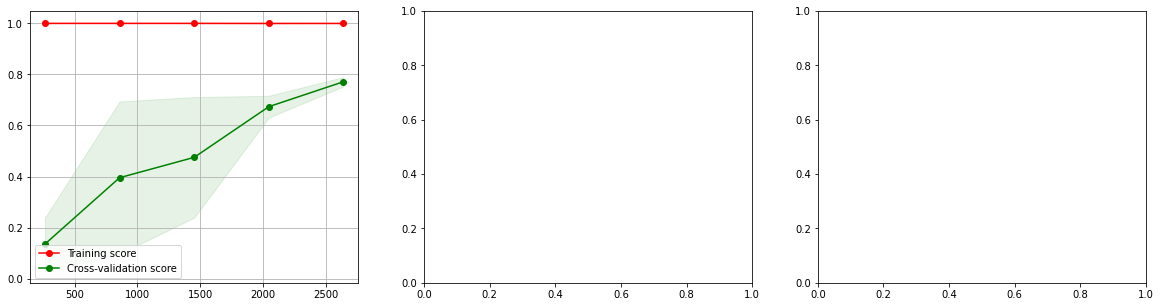

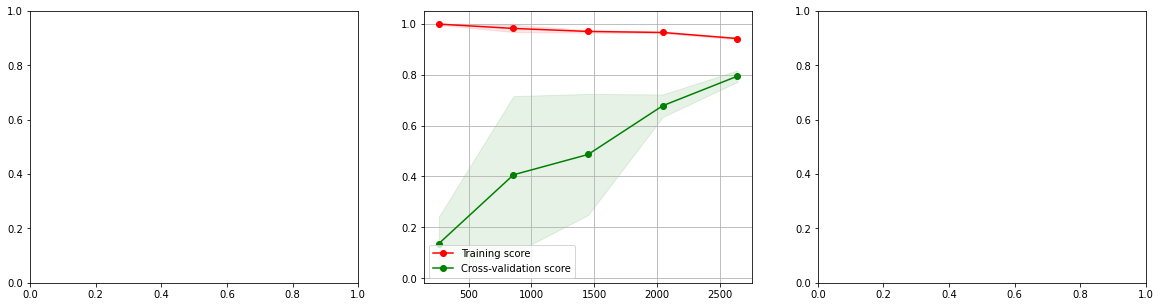

In [7]:
print("LEARNING CURVE KNN")
learn_knn_train_Size, learn_knn_TrainScore, learn_knn_TestScore, learn_knn_Fit, _= learning_curve(knn_clf,trainingSet, trainingTarget, return_times=True)
train_score_mean=np.mean(learn_knn_TrainScore, axis=1)
train_score_std=np.std(learn_knn_TrainScore, axis=1)
test_score_mean=np.mean(learn_knn_TestScore, axis=1)
test_score_std=np.std(learn_knn_TestScore, axis=1)

_, axes=plt.subplots(1,3, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[0].grid()
axes[0].fill_between(learn_knn_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[0].fill_between(learn_knn_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[0].plot(learn_knn_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(learn_knn_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")
# plt.show()
print("LEARNING CURVE SVM")
learn_svm_train_Size, learn_svm_TrainScore, learn_svm_TestScore, learn_svm_Fit, _= learning_curve(svm_clf,trainingSet, trainingTarget, return_times=True)
train_score_mean=np.mean(learn_svm_TrainScore, axis=1)
train_score_std=np.std(learn_svm_TrainScore, axis=1)
test_score_mean=np.mean(learn_svm_TestScore, axis=1)
test_score_std=np.std(learn_svm_TestScore, axis=1)

_, axes=plt.subplots(1,3, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[1].grid()
axes[1].fill_between(learn_svm_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[1].fill_between(learn_svm_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[1].plot(learn_svm_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[1].plot(learn_svm_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[1].legend(loc="best")
plt.show()

RFC
[array(['b'], dtype='<U1') '---------' array(['b'], dtype='<U1')
 '---------' array(['b'], dtype='<U1') '---------'
 array(['b'], dtype='<U1') '---------' array(['b'], dtype='<U1')
 '---------' array(['b'], dtype='<U1') '---------'
 array(['b'], dtype='<U1') '---------' array(['b'], dtype='<U1')
 '---------' array(['b'], dtype='<U1') '---------'
 array(['b'], dtype='<U1') '---------' array(['b'], dtype='<U1')
 '---------' array(['c'], dtype='<U1') '---------'
 array(['c'], dtype='<U1') '---------' array(['c'], dtype='<U1')
 '---------' array(['c'], dtype='<U1') '---------'
 array(['c'], dtype='<U1') '---------' array(['c'], dtype='<U1')
 '---------' array(['c'], dtype='<U1') '---------'
 array(['c'], dtype='<U1') '---------' array(['c'], dtype='<U1')
 '---------' array(['c'], dtype='<U1') '---------'
 array(['c'], dtype='<U1') '---------' array(['d'], dtype='<U1')
 '---------' array(['d'], dtype='<U1') '---------'
 array(['d'], dtype='<U1') '---------' array(['d'], dtype='<U1')
 '-

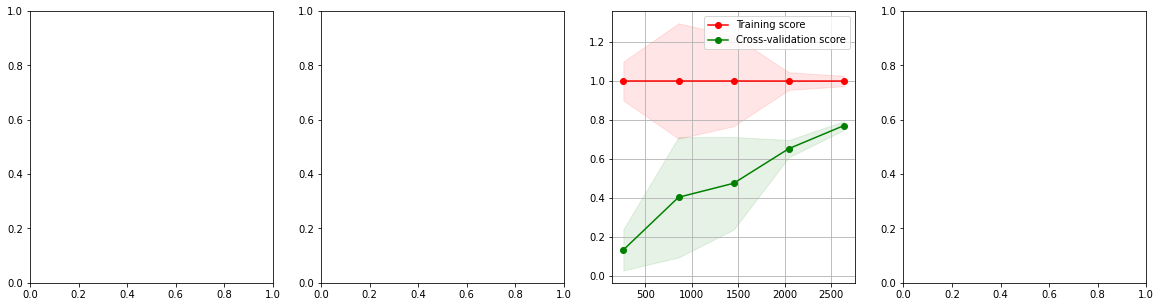

In [8]:
print("RFC")   
print(np.asarray(all_files_rfc, dtype='object'))
print("\n\n\n")
temp = cross_val_score(rfc, trainingSet, trainingTarget, cv=3, scoring="accuracy")
print("RFC Acc:", temp)
# cur=roc_curve(trainingTarget, temp)
# print(cur)
# print("COMPARE KNN AND RFC")
# cur=classification_report(all_files_knn, all_files_rfc)
# print(cur)
# print("COMPARE RFC AND SVM")
# cur=classification_report(all_files_rfc, all_files_svm)
# print(cur)

print("LEARNING CURVE RFC")
learn_svm_train_Size, learn_svm_Trainscore, learn_svm_TestScore, learn_svm_Fit, _= learning_curve(rfc,trainingSet, trainingTarget, return_times=True)
train_score_mean=np.mean(learn_svm_Trainscore, axis=1)
train_score_std=np.std(learn_svm_Trainscore, axis=1)
test_score_mean=np.mean(learn_svm_TestScore, axis=1)
train_score_std=np.std(learn_svm_TestScore, axis=1)

_, axes=plt.subplots(1,4, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[2].grid()
axes[2].fill_between(learn_svm_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[2].fill_between(learn_svm_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[2].plot(learn_svm_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[2].plot(learn_svm_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[2].legend(loc="best")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP Acc: [0.03272727 0.03363636 0.03272727]
LEARNING CURVE MLP


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


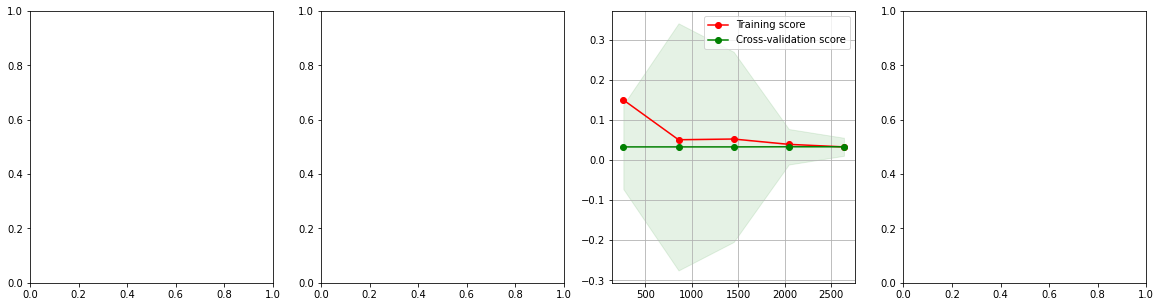

In [9]:
temp = cross_val_score(nn, trainingSet, trainingTarget, cv=3, scoring="accuracy")
print("MLP Acc:", temp)

print("LEARNING CURVE MLP")
learn_svm_train_Size, learn_svm_Trainscore, learn_svm_TestScore, learn_svm_Fit, _= learning_curve(nn,trainingSet, trainingTarget, return_times=True)
train_score_mean=np.mean(learn_svm_Trainscore, axis=1)
train_score_std=np.std(learn_svm_Trainscore, axis=1)
test_score_mean=np.mean(learn_svm_TestScore, axis=1)
train_score_std=np.std(learn_svm_TestScore, axis=1)

_, axes=plt.subplots(1,4, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[2].grid()
axes[2].fill_between(learn_svm_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[2].fill_between(learn_svm_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[2].plot(learn_svm_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[2].plot(learn_svm_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[2].legend(loc="best")
plt.show()

In [10]:
# SVM OUTPUT ARR
print(np.asarray(all_files_svm, dtype='object'))


[['b']
 ['z']
 ['b']
 ['b']
 ['b']
 ['b']
 ['z']
 ['z']
 ['z']
 ['z']
 ['z']
 ['t']
 ['c']
 ['c']
 ['c']
 ['c']
 ['t']
 ['t']
 ['t']
 ['c']
 ['t']
 ['c']
 ['d']
 ['d']
 ['d']
 ['d']
 ['d']
 ['d']
 ['d']
 ['d']
 ['d']
 ['d']
 ['d']
 ['e']
 ['e']
 ['e']
 ['e']
 ['e']
 ['e']
 ['e']
 ['e']
 ['e']
 ['e']
 ['e']
 ['f']
 ['f']
 ['f']
 ['f']
 ['f']
 ['f']
 ['f']
 ['f']
 ['f']
 ['f']
 ['f']
 ['g']
 ['g']
 ['g']
 ['g']
 ['d']
 ['g']
 ['g']
 ['g']
 ['g']
 ['g']
 ['g']
 ['h']
 ['h']
 ['h']
 ['h']
 ['h']
 ['h']
 ['h']
 ['h']
 ['h']
 ['h']
 ['h']
 ['i']
 ['i']
 ['i']
 ['i']
 ['i']
 ['i']
 ['i']
 ['i']
 ['i']
 ['i']
 ['i']
 ['2']
 ['j']
 ['j']
 ['j']
 ['j']
 ['j']
 ['j']
 ['j']
 ['j']
 ['j']
 ['j']
 ['k']
 ['k']
 ['k']
 ['r']
 ['e']
 ['r']
 ['k']
 ['k']
 ['k']
 ['k']
 ['r']
 ['l']
 ['l']
 ['l']
 ['l']
 ['l']
 ['l']
 ['l']
 ['l']
 ['l']
 ['l']
 ['l']
 ['m']
 ['m']
 ['m']
 ['m']
 ['m']
 ['m']
 ['m']
 ['m']
 ['m']
 ['m']
 ['m']
 ['n']
 ['n']
 ['n']
 ['n']
 ['n']
 ['n']
 ['n']
 ['n']
 ['n']
 ['n']
 ['n']

In [11]:
# SVM ACC
temp = cross_val_score(svm_clf, trainingSet, trainingTarget, cv=3, scoring="accuracy")
print("SVM Acc:", temp)


SVM Acc: [0.76       0.79818182 0.72636364]


KNN CONF MATRIX


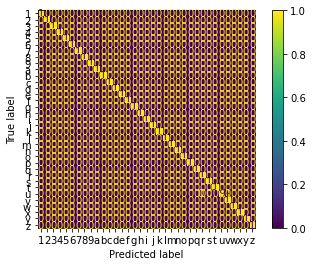

In [12]:
from sklearn.metrics import plot_confusion_matrix
knn_cfm= plot_confusion_matrix(knn_clf, trainingSet, trainingTarget, normalize='true')
print("KNN CONF MATRIX")
knn_cfm

SVM CONF MATRIX


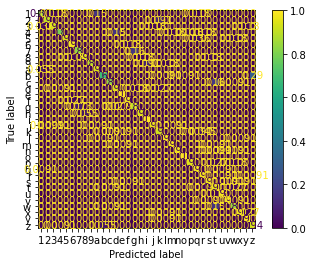

In [13]:
svm_cfm= plot_confusion_matrix(svm_clf, trainingSet, trainingTarget, normalize='true')
print("SVM CONF MATRIX")
svm_cfm

RFC CONF MATRIX


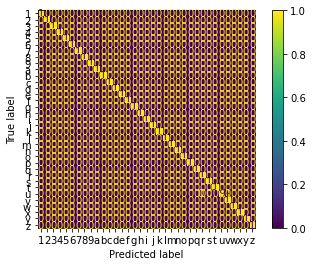

In [14]:
rfc_cfm= plot_confusion_matrix(rfc, trainingSet, trainingTarget, normalize='true')
print("RFC CONF MATRIX")
rfc_cfm

MLP CONF MATRIX


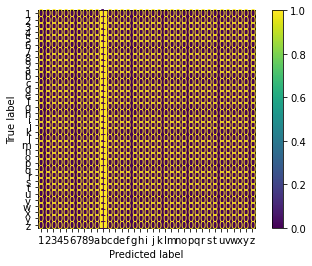

In [15]:
mlp_cfm= plot_confusion_matrix(nn, trainingSet, trainingTarget, normalize='true')
print("MLP CONF MATRIX")
mlp_cfm